In [26]:
import matplotlib.pyplot as plot
import pandas as pd


def hist_column(df, col, title):
    df[col].hist(bins=10)
    plot.title(title)
    plot.xlabel('Predict prob')
    plot.ylabel('Amount candidates')
    plot.show()

# After first classificator

In [27]:
dr13 = pd.read_csv('../data/predict-data/min_proba_10_bins.csv')
dr13 = dr13[dr13.min_predict > 0.99]
dr13['field'] = list(
    map(
        int,
        [str(x)[0:4] if len(str(x)) == 16 else str(x)[0:3] for x in dr13.oid],
    )
)
print(f'Amount dr13 candidates threshold=0.99 - {dr13.shape[0]}')
dr13.head()

Amount dr13 candidates threshold=0.99 - 25852


,n_bin,name_model,oid,flare_start,min_predict,borders,field
0,1,min_proba,806205100000287,59032.42685,1.0,"[0.99, 1.0)",806
1,1,min_proba,260202200043861,58480.33153,1.0,"[0.99, 1.0)",260
2,1,min_proba,802210400052376,59027.39714,1.0,"[0.99, 1.0)",802
3,1,min_proba,727203100020023,58298.35790,1.0,"[0.99, 1.0)",727
4,1,min_proba,767213200044249,58451.06861,1.0,"[0.99, 1.0)",767


In [28]:
dr17 = pd.read_csv('../data/predict-data/all_fields_0.96_sharpness.csv')
dr17 = dr17[dr17.asteroid == False]
dr17 = dr17[dr17.min_prob > 0.965]
print(f'Amount dr17 candidates threshold=0.965 - {dr17.shape[0]}')
dr17.head()

Amount dr17 candidates threshold=0.965 - 26137


,field,oid,flare_start,time_maximum,fwhm_start,fwhm_maximum,min_prob,diff_fwhm,ra,dec,asteroid,asteroid_name,sharpness_flare_start,sharpness_time_maximum,diff_sharpness
1,257,257209400041468,58471.29644,58471.33800,3.27200,3.56559,0.973510,-0.29359,92.957146,-23.779064,False,No object,0.004,0.001,0.003
4,258,258209100006307,58487.26878,58487.27836,2.86813,2.55922,0.975767,0.30891,100.989838,-22.662392,False,No object,-0.006,0.003,-0.009
5,258,258209400007679,58487.26872,58487.26917,2.86813,2.97455,0.965160,-0.10642,101.016472,-23.569754,False,No object,0.050,0.050,0.000
6,258,258206400028735,58487.26852,58487.34210,2.86813,3.35794,0.969121,-0.48981,98.869926,-26.043184,False,No object,-0.007,0.010,-0.017
7,258,258203200010045,58487.26842,58487.32236,2.86813,2.76534,0.965160,0.10279,95.886703,-26.983698,False,No object,0.029,-0.040,0.069


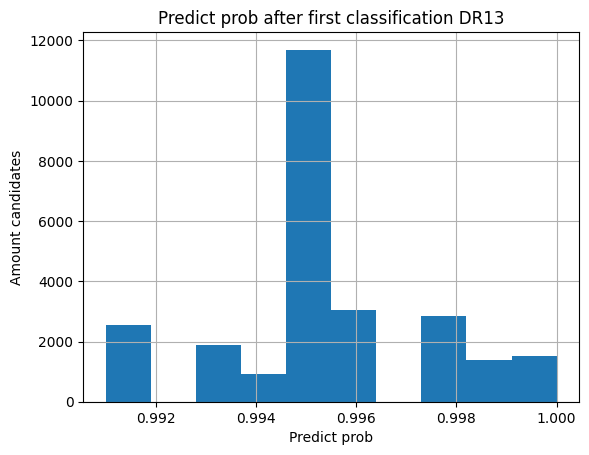

In [29]:
hist_column(dr13, 'min_predict', 'Predict prob after first classification DR13')

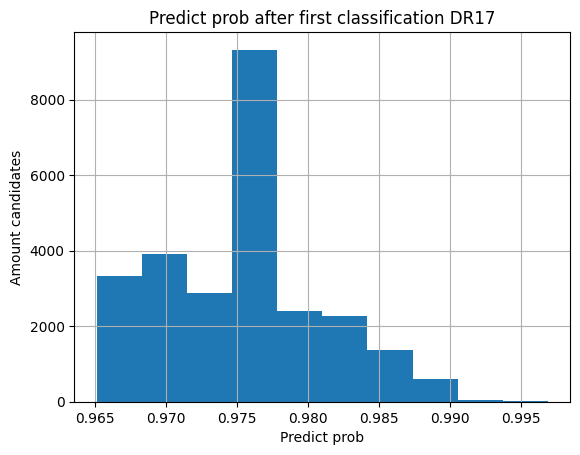

In [30]:
hist_column(dr17, 'min_prob', 'Predict prob after first classification DR17')

# Postfilter

In [31]:
dr_13_postfilter = pd.read_csv(
    '../data/predict-data/postfilter_candidates.csv'
).drop(['Unnamed: 0'], axis=1)
print(f'Amount dr13 candidates - {dr_13_postfilter.shape[0]}')
dr_13_postfilter.head()

Amount dr13 candidates - 1945


,oid,flare_start,predict_prob,time_series,m_label,ra,dec,asteroid,asteroid_name,time_maximum,sharpness_flare_start,sharpness_time_maximum,diff_sharpness,exposure_id_start,exposure_id_maximum,fwhm_start,fwhm_maximum,diff_fwhm,postfilter_prob
0,486209100090537,58671.22099,0.994928,"[0.9451200000039535, 58671.22099, 16.60011, 0....",NaN,277.725189,5.934464,False,No object,58671.25332,-0.031,-0.143,0.112,91721571,91724804,2.752560,1.971830,0.78073,0.964941
1,828213300011018,59035.37625,0.994928,"[0.027099999999336433, 59035.37625, 17.100452,...",NaN,304.805969,64.286949,False,No object,59035.39963,-0.064,-0.032,-0.032,128137638,128139929,1.732870,1.754510,-0.02164,0.915434
2,701205400028327,58792.26149,0.997480,"[0.8874899999937043, 58792.26149, 17.900614, 0...",NaN,66.755539,39.268085,False,No object,58792.31300,0.048,-0.032,0.080,103825653,103830804,1.771170,1.490910,0.28026,0.931071
3,491211300004395,58670.31841,0.999402,"[4.893230000001495, 58670.31841, 16.812654, 0....",NaN,307.841156,5.345507,False,No object,58670.38255,-0.045,-0.012,-0.033,91631348,91637761,1.596990,1.360120,0.23687,0.942616
4,637212300002727,58657.27609,0.995176,"[3.858009999996284, 58657.27609, 15.007533, 0....",NaN,275.080963,26.985949,False,No object,58657.32083,0.026,-0.575,0.601,90327218,90331692,2.103685,1.674705,0.42898,0.999392


In [32]:
dr_17_postfilter = pd.read_csv(
    '../data/predict-data/all_fields_postfilter_predict3.csv'
)
dr_17_postfilter = dr_17_postfilter[dr_17_postfilter.asteroid == False]
dr_17_postfilter = dr_17_postfilter[dr_17_postfilter.postfilter_prob > 0.995]
print(f'Amount dr17 candidates - {dr_17_postfilter.shape[0]}')
dr_17_postfilter.head()

Amount dr17 candidates - 1940


,field,oid,flare_start,time_maximum,fwhm_start,fwhm_maximum,min_prob,diff_fwhm,ra,dec,asteroid,asteroid_name,sharpness_flare_start,sharpness_time_maximum,diff_sharpness,postfilter_prob
14,259,259215100013413,58455.37274,58455.40198,3.147690,2.290540,0.961439,0.857150,104.011726,-20.862522,False,No object,0.081,-0.056,0.137,0.996922
23,259,259201200024830,58461.39539,58461.42863,2.727435,1.905885,0.961513,0.821550,106.983948,-26.914001,False,No object,-0.006,-0.030,0.024,0.997003
26,259,259207300021409,58461.39561,58461.40339,2.727435,2.179765,0.988471,0.547670,103.221756,-25.881416,False,No object,-0.086,-0.110,0.024,0.998998
40,259,259206200048920,58461.39564,58461.43527,2.727435,2.172640,0.963380,0.554795,105.153175,-24.454481,False,No object,0.019,-0.090,0.109,0.998083
61,260,260213400021579,58476.33830,58476.40048,2.276060,2.135720,0.975767,0.140340,115.466293,-21.765642,False,No object,0.013,-0.111,0.124,0.997765


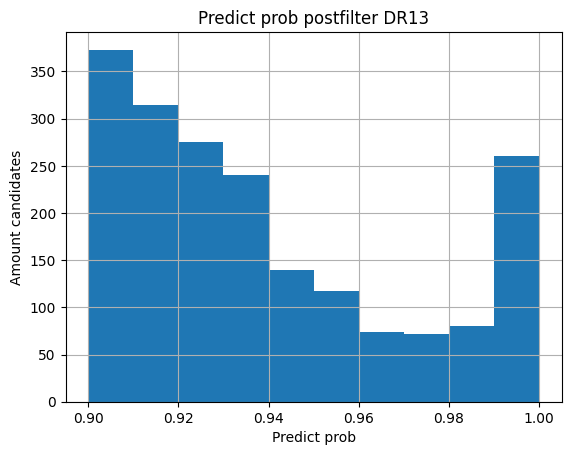

In [33]:
hist_column(dr_13_postfilter, 'postfilter_prob', 'Predict prob postfilter DR13')

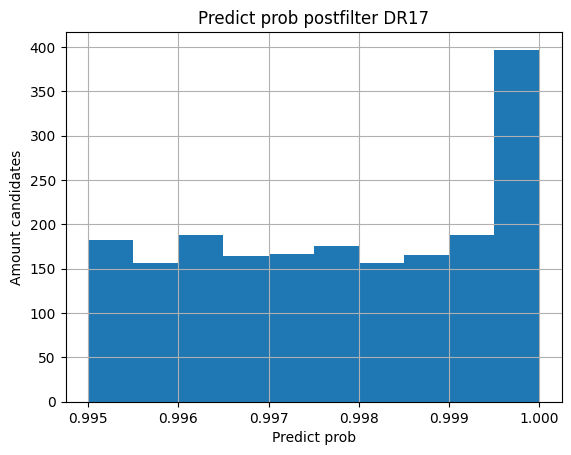

In [34]:
hist_column(dr_17_postfilter, 'postfilter_prob', 'Predict prob postfilter DR17')

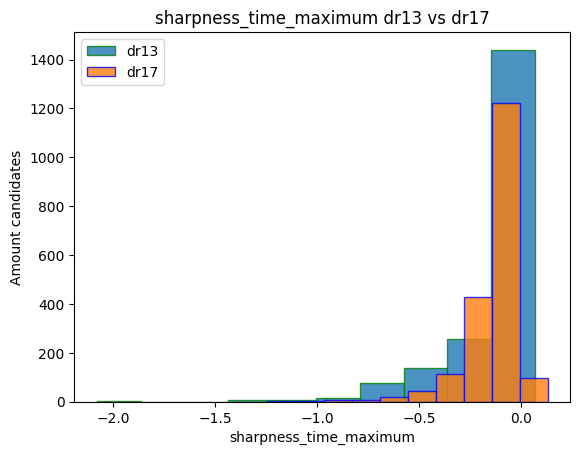

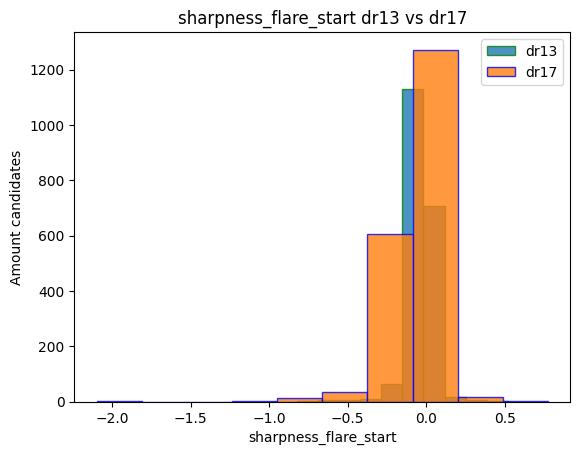

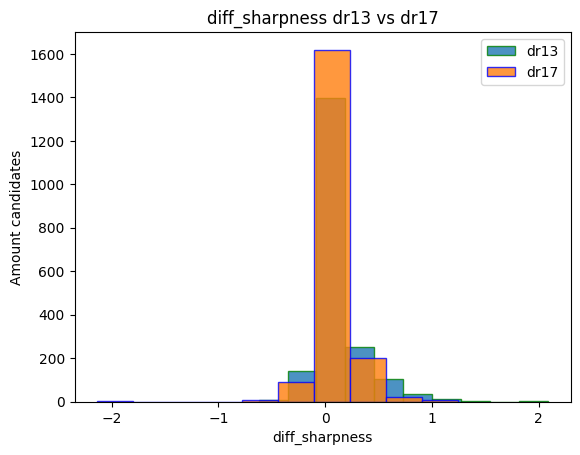

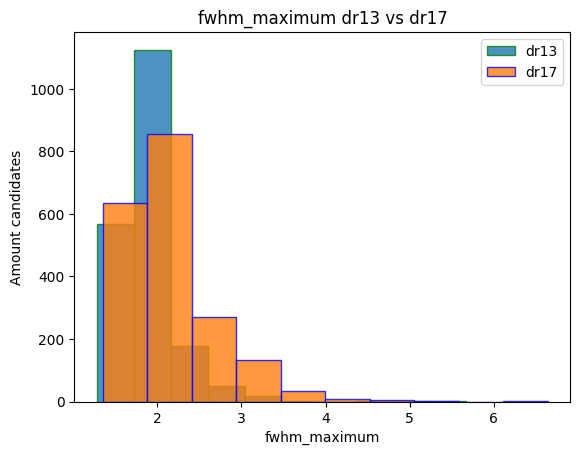

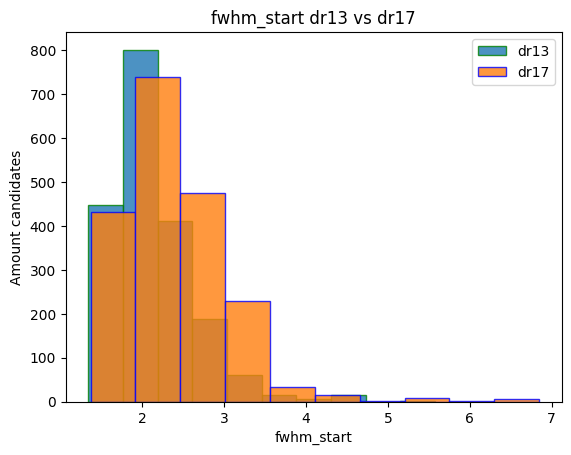

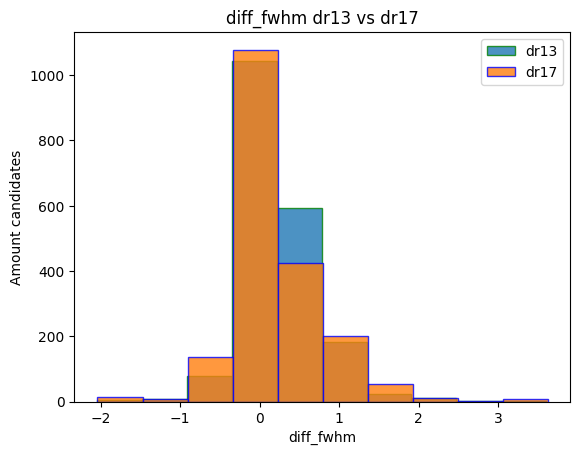

In [36]:
col_list = [
    'sharpness_time_maximum',
    'sharpness_flare_start',
    'diff_sharpness',
    'fwhm_maximum',
    'fwhm_start',
    'diff_fwhm',
]
for col in col_list:
    _, bins, _ = plot.hist(
        dr_13_postfilter[col], label='dr13', alpha=0.8, edgecolor='green'
    )
    plot.hist(
        dr_17_postfilter[col],
        bins=len(bins) - 1,
        label='dr17',
        alpha=0.8,
        edgecolor='blue',
    )
    plot.title(f'{col} dr13 vs dr17')
    plot.xlabel(f'{col}')
    plot.ylabel('Amount candidates')
    plot.legend()
    plot.show()

# ZTF FIELD MAP

Text(0.5, 0.98, 'DR 13')

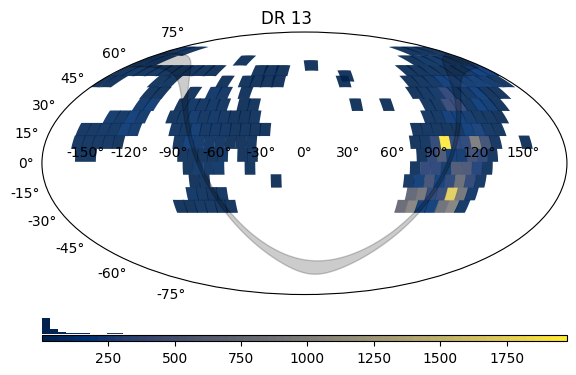

In [44]:
import ztffields

dr13_fields = dr13.groupby('field').size()
fig = ztffields.skyplot_fields(dr13_fields)
fig.suptitle('DR 13')


Text(0.5, 0.98, 'DR 17')

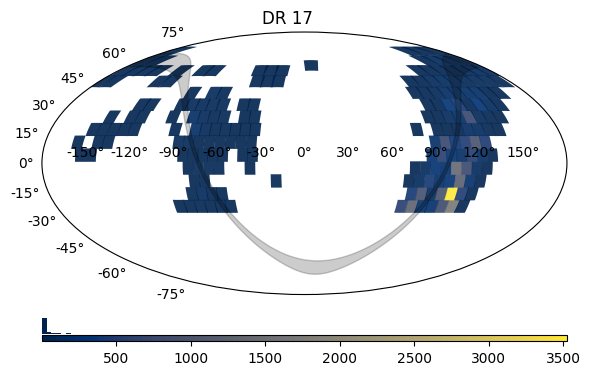

In [45]:
dr17_fields = dr17.groupby('field').size()
fig = ztffields.skyplot_fields(dr17_fields)
fig.suptitle('DR 17')


# File for make label

In [ ]:
link = 'https://ztf.snad.space/dr17/view/'
file = dr_17_postfilter[
    ['oid', 'flare_start', 'time_maximum', 'postfilter_prob']
].reset_index(drop=True)
file['link'] = [
    f'{link}{o}?min_mjd={s}&max_mjd={m+0.3}'
    for o, s, m in zip(file['oid'], file['flare_start'], file['time_maximum'])
]
file['tag'] = ''
file.head()

,oid,flare_start,time_maximum,postfilter_prob,link,tag
0,259215100013413,58455.37274,58455.40198,0.996922,https://ztf.snad.space/dr17/view/2592151000134...,
1,259201200024830,58461.39539,58461.42863,0.997003,https://ztf.snad.space/dr17/view/2592012000248...,
2,259207300021409,58461.39561,58461.40339,0.998998,https://ztf.snad.space/dr17/view/2592073000214...,
3,259206200048920,58461.39564,58461.43527,0.998083,https://ztf.snad.space/dr17/view/2592062000489...,
4,260213400021579,58476.33830,58476.40048,0.997765,https://ztf.snad.space/dr17/view/2602134000215...,


In [ ]:
file.to_csv('../data/predict-data/data_for_label.csv', index=False)

In [ ]:
file.sample(n=100, random_state=42).to_csv(
    '../data/predict-data/data_for_label_100_samples.csv', index=False
)
